# Spatial Analysis

In [97]:
from descartes import PolygonPatch
import geopandas as gp
#import pysal as ps
import numpy as np

# Import libraries for visualization
from matplotlib import pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import json
from descartes import PolygonPatch
#from shapely.geometry import Polygon

In [11]:
# Open the geojson of NUTS 2 regions to get the coordinates of the regions
with open("/Users/maxbehrens/Documents/Msc/Thesis/Data/geo_data_2016/NUTS_RG_01M_2016_4326_LEVL_2.geojson") as f:
    nuts2_poly_2016 = json.load(f)

with open("/Users/maxbehrens/Documents/Msc/Thesis/Data/geo_data_2013/NUTS_RG_01M_2013_4326_LEVL_2.geojson") as f:
    nuts2_poly_2013 = json.load(f)

with open("/Users/maxbehrens/Documents/Msc/Thesis/Data/geo_data_2010/NUTS_RG_01M_2010_4326_LEVL_2.geojson") as f:
    nuts2_poly_2010 = json.load(f)

with open("/Users/maxbehrens/Documents/Msc/Thesis/Data/geo_data_2006/NUTS_RG_01M_2006_4326_LEVL_2.geojson") as f:
    nuts2_poly_2006 = json.load(f)

In [12]:
# Get the cleaned GDP data to match with regions and download correct data
gdp_data = pd.read_csv('/Users/maxbehrens/Documents/Msc/Thesis/Data/gdp_data/nuts_gdp_cleaned.csv')
gdp_data.head()

region  year    value code  country
0     BE  2008  33100.0   BE  Belgium
1    BE1  2008  61100.0   BE  Belgium
2   BE10  2008  61100.0   BE  Belgium
3    BE2  2008  33100.0   BE  Belgium
4   BE21  2008  39200.0   BE  Belgium

In [132]:
poly_used = []
poly_not = []
for i in range(len(nuts2_poly_2016['features'])):
    if np.any(gdp_data.loc[gdp_data['year']==2017,'region'].isin([nuts2_poly_2016['features'][i]['properties']['NUTS_ID']])):
        if nuts2_poly_2016['features'][i]['geometry']['type'] == 'MultiPolygon':
            t = nuts2_poly_2016['features'][i]['geometry']['coordinates'][0][0]
        else:    
            t = nuts2_poly_2016['features'][i]['geometry']['coordinates'][0]

        x = [coord[0] for coord in t]
        y = [coord[1] for coord in t]

        p = Polygon(tuple(zip(x,y)))
        poly_used.append(p)
    else:
        if nuts2_poly_2016['features'][i]['geometry']['type'] == 'MultiPolygon':
            t = nuts2_poly_2016['features'][i]['geometry']['coordinates'][0][0]
        else:    
            t = nuts2_poly_2016['features'][i]['geometry']['coordinates'][0]

        x = [coord[0] for coord in t]
        y = [coord[1] for coord in t]

        p = Polygon(tuple(zip(x,y)))
        poly_not.append(p)

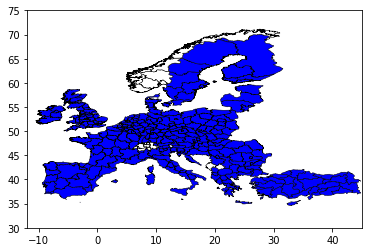

<Figure size 5000x2500 with 0 Axes>

In [133]:
fig, ax = plt.subplots()

p = PatchCollection(poly_used, color='blue',lw=0.5,edgecolor='k')
ax.add_collection(p)

p = PatchCollection(poly_not, color='white',lw=0.5,edgecolor='k')
ax.add_collection(p)

ax.autoscale_view()
ax.set_xlim((-12,45))
ax.set_ylim((30,75))
plt.figure(figsize=(20,10), dpi=250)
fig.savefig('/Users/maxbehrens/Documents/Msc/Thesis/Data/plots/nuts2017_mapping.png', dpi=250)
plt.show()

In [92]:
PatchCollection(poly_used, color='white',lw=3,edgecolor='k')